## Observations and Insights 

Here are my three observations from the data:
1. Capomulin and Ramicane were the two most counted regimens and they both had the lowest mean tumor volume. To me this shows a positive result given the volume of testing and tumor size.
2. I observed mouse s185's tumor volume decreased over time, demonstrating the effectiveness of the capomulin regimen.
3. After conducting the regression analysis weight vs tumor volume for the capomulin regimen, it appeared that there was a positive correlation between the two variables. This means that

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Checking the number of mice.

#Value counts gives a series of the count for each value in Mouse ID
mice = combine_df['Mouse ID'].value_counts()

#Len mice gives the length of the series which is the amount of mice
len(mice)

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combine_df.groupby(["Mouse ID", "Timepoint"])

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 

In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

In [41]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].value_counts())

249

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_group = clean_df.groupby('Drug Regimen')
rmean = regimen_group["Tumor Volume (mm3)"].mean()
rmedian = regimen_group["Tumor Volume (mm3)"].median()
rvar = regimen_group["Tumor Volume (mm3)"].var()
rstdev = regimen_group["Tumor Volume (mm3)"].std()
rsem = regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame(rmean)
summary_df["Median"] = rmedian
summary_df["Variance"] = rvar
summary_df["Standard Deviation"] = rstdev
summary_df["SEM"] = rsem
summary_df = summary_df.rename(columns = {"Tumor Volume (mm3)" : "Mean"})
summary_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
short_summary = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].describe()
short_summary

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.382993,6.574208,45.000000,47.046068,50.783528,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#First calculate the number of measurments for each regimen
measurements = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].count()
measurements


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

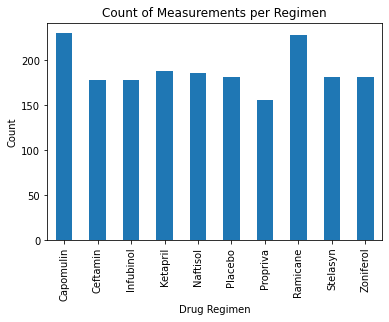

In [45]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements.plot(kind='bar', title='Count of Measurements per Regimen', ylabel = 'Count')
plt.show()

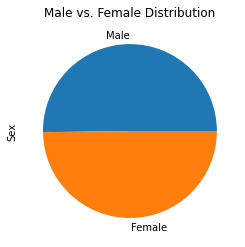

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# First remove all the duplicate mouse IDs so its just a single mouse
single_mouse = clean_df.drop_duplicates(subset=['Mouse ID'], keep='last')

#Count the genders
genders = single_mouse["Sex"].value_counts()

#Plot the genders
genders.plot(kind = 'pie', title = 'Male vs. Female Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_mouse = clean_df.drop_duplicates(subset=['Mouse ID'], keep='last')

#Getting only the values for the drugs we want forst get each drug then merge

capo = last_mouse.loc[(last_mouse["Drug Regimen"] == "Capomulin")]
rami = last_mouse.loc[(last_mouse["Drug Regimen"] == "Ramicane")]
infub = last_mouse.loc[(last_mouse["Drug Regimen"] == "Infubinol")]
ceft = last_mouse.loc[(last_mouse["Drug Regimen"] == "Ceftamin")]

all_drugs = pd.concat([capo, rami, infub, ceft])

all_drugs



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Completed by dropping the duplicates and keeping the last volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = all_drugs["Tumor Volume (mm3)"] 
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# This code was used from activity 2 in day 3 of Matplotlib lessons
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
tumor_vol
    

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The the median of Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


19      23.343598
29      28.484033
39      28.430964
64      30.485985
104     31.023923
          ...    
1743    45.000000
1773    64.634949
1797    61.386660
1845    68.594745
1855    64.729837
Name: Tumor Volume (mm3), Length: 100, dtype: float64

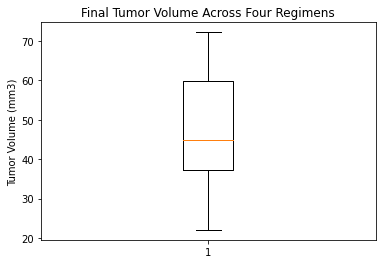

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Four Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

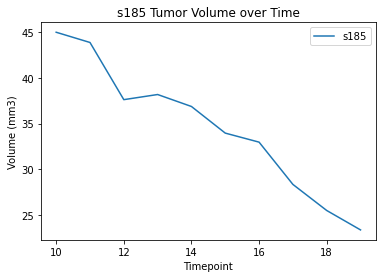

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
capomulin_df

#Chosing the first mouse and getting a df
mouse1 = capomulin_df.loc[(capomulin_df["Mouse ID"] == "s185")] 

#Plotting the tumor volume over time
plt.plot(mouse1["Tumor Volume (mm3)"])
plt.title("s185 Tumor Volume over Time")
plt.xlabel("Timepoint")
plt.ylabel("Volume (mm3)")
plt.legend(['s185'])
plt.show()

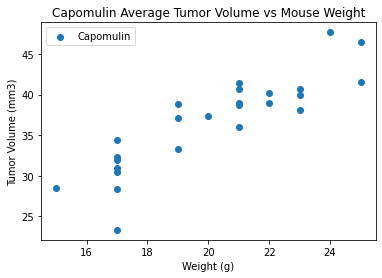

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen using the last time value
capomulin_df = last_mouse.loc[(clean_df["Drug Regimen"] == "Capomulin")]
plt.scatter(capomulin_df["Weight (g)"].tolist(), capomulin_df["Tumor Volume (mm3)"].tolist())
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Average Tumor Volume vs Mouse Weight")
plt.legend(["Capomulin"])
plt.show()

## Correlation and Regression

The r-squared is: 0.7686134812139


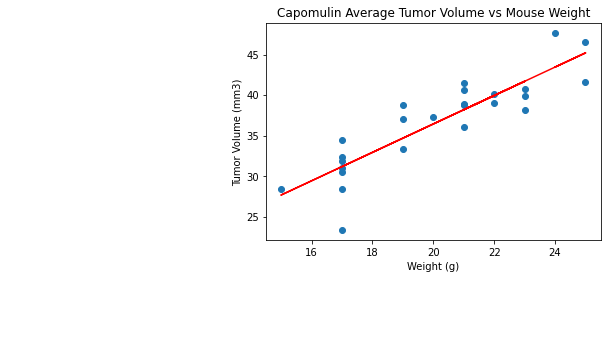

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Gettting the x and y values
x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]

#using the regression code from matplotlib day 3 activity 8
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin Average Tumor Volume vs Mouse Weight")
print(f"The r-squared is: {rvalue**2}")
plt.show()